In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kstest, jarque_bera, norm
from scipy.stats import t
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.distributions.empirical_distribution import ECDF

## Opis danych

In [3]:
#data = np.loadtxt("flavors_of_cacao.csv", delimiter=',', dtype="str")
data = pd.read_csv("possum.csv", usecols=["hdlngth", "totlngth"])
x_data = data["totlngth"]
y_data = data["hdlngth"]

### Wykres danych

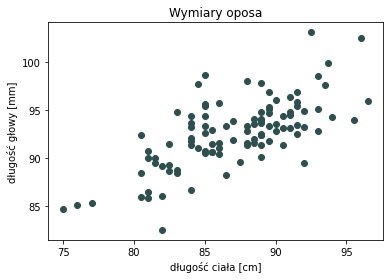

In [4]:
plt.scatter(x_data, y_data, color="darkslategray")
plt.xlabel("długość ciała [cm]")
plt.ylabel("długość głowy [mm]")
plt.title("Wymiary oposa")
plt.savefig("data_plot.png")

### Statystyki opisowe

Dla długości głowy oposa

In [5]:
print("średnia: ", np.mean(y_data))
print("wariancja: ", np.var(y_data))
print("minimum: ", min(y_data))
print("maksimum: ", max(y_data))
print("mediana: ", np.median(y_data))

średnia:  92.60288461538462
wariancja:  12.646049371301773
minimum:  82.5
maksimum:  103.1
mediana:  92.8


Dla długości ciała oposa

In [6]:
print("średnia: ", np.mean(x_data))
print("wariancja: ", np.var(x_data))
print("minimum: ", min(x_data))
print("maksimum: ", max(x_data))
print("mediana: ", np.median(x_data))

średnia:  87.08846153846154
wariancja:  18.40217455621302
minimum:  75.0
maksimum:  96.5
mediana:  88.0


## Dobranie prostej regresji do danych

In [7]:
def reg_lin_func(x, x_data, y_data):
    x_mean = np.mean(x_data)
    y_mean = np.mean(y_data)
    data_len = len(x_data)
    b1 = sum([(x_data[i] - x_mean)*y_data[i] for i in range(data_len)])/sum([(x_data[i] - x_mean)**2 for i in range(data_len)])
    b0 = y_mean - b1*x_mean
    return b0 + b1*x

In [8]:
def count_estyms(x_data, y_data):
    x_mean = np.mean(x_data)
    y_mean = np.mean(y_data)
    data_len = len(x_data)

    b1_estym = sum([(x_data[i] - x_mean)*y_data[i] for i in range(data_len)])/sum([(x_data[i] - x_mean)**2 for i in range(data_len)])
    b0_estym = y_mean - b1_estym*x_mean

    return b0_estym, b1_estym

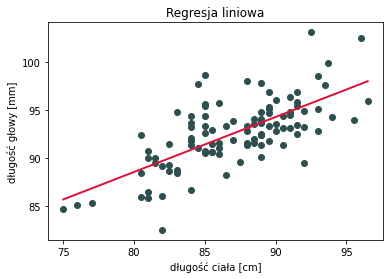

In [20]:
x_range = np.linspace(min(x_data), max(x_data), len(data)*100)
plt.scatter(x_data, y_data, color="darkslategray")
plt.plot(x_range, reg_lin_func(x_range, x_data, y_data), color="crimson", linewidth=2)
plt.xlabel("długość ciała [cm]")
plt.ylabel("długość głowy [mm]")
plt.title("Regresja liniowa")
plt.savefig("regression_plot.png")

In [10]:
x_mean = np.mean(x_data)
y_mean = np.mean(y_data)
data_len = len(x_data)

b1_estym = sum([(x_data[i] - x_mean)*y_data[i] for i in range(data_len)])/sum([(x_data[i] - x_mean)**2 for i in range(data_len)])
b0_estym = y_mean - b1_estym*x_mean
print(b1_estym, b0_estym)

0.5729012843381509 42.70979314896635


### Współczynnik determinancji

In [11]:
y_estym = [b1_estym*x + b0_estym for x in x_data]
r = sum([(y_estym[i] - y_mean)**2 for i in range(len(data))])/sum([(y_data[i] - y_mean)**2 for i in range(len(data))])
print("Współczynnik determinacji: ", r)

Współczynnik determinacji:  0.47761049857697735


## Poziom istotności

In [12]:
n = len(data)
alpha = 0.05

In [13]:
s = np.sqrt(sum([(y_data[i] - y_estym[i])**2 for i in range(n)])/(n-2))
d1 = np.sqrt(sum([(x - x_mean)**2 for x in x_data]))
d2 = np.sqrt(1/n + x_mean**2/sum([(x - x_mean)**2 for x in x_data]))
t_quantile = t.ppf(1 - alpha/2, n-2)        
#tworzenie przedziałów
left_b1 = b1_estym - t_quantile*(s/d1)
right_b1 = b1_estym + t_quantile*(s/d1)
left_b0 = b0_estym - t_quantile*s*d2
right_b0 = b0_estym + t_quantile*s*d2

In [14]:
print("Dla b0: ", left_b0, right_b0)
print("Dla b0: ", left_b1, right_b1)

Dla b0:  32.44954148403124 52.97004481390145
Dla b0:  0.45522981825613723 0.6905727504201646


## Analiza residuów

In [28]:
e_tab = [y_data[i] - y_estym[i] for i in range(data_len)]
mu_estym = np.mean(e_tab)
sigma_estym = np.std(e_tab) #wariancja

print(mu_estym, sigma_estym**2)

-4.5092135154006356e-15 6.6061634260446445


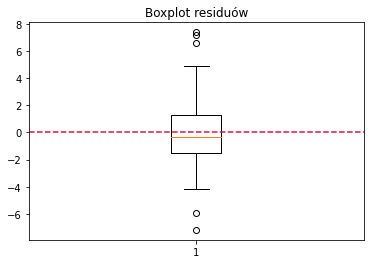

In [29]:
plt.boxplot(e_tab)
plt.axhline(y=0, linestyle='--', color='crimson')
plt.title("Boxplot residuów")
plt.savefig("boxplot_residuals.png")

Kolmogorov-Smirnov test p-value: 3.2975571178145846e-06
Jarque-Bera test p-value: 0.0774400366217578


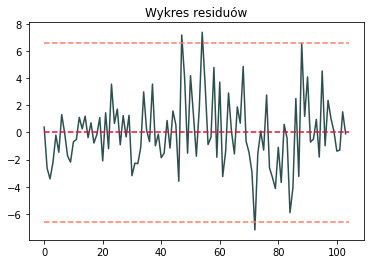

In [26]:

x_range = np.linspace(0, 104, 1000)
plt.plot(e_tab, color="darkslategray")
plt.plot(x_range, [mu_estym for __ in range(len(x_range))], linestyle='--', color='crimson')
plt.plot(x_range, [sigma_estym for __ in range(len(x_range))], linestyle='--', color='salmon')
plt.plot(x_range, [-sigma_estym for __ in range(len(x_range))], linestyle='--', color='salmon')
plt.title("Wykres residuów")
plt.savefig("plot_residuals.png")

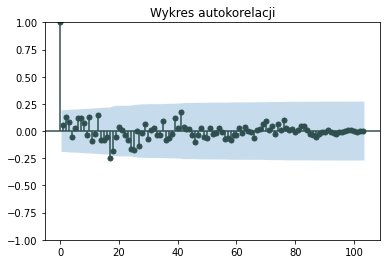

In [71]:

residuals = np.array([y_data[i] - y_estym[i] for i in range(data_len)])

plot_acf(residuals, color="darkslategray", vlines_kwargs={"colors": "darkslategray"}, lags=103)
plt.title("Wykres autokorelacji")
plt.savefig("corr_plot.png")

In [51]:
#testy
#X = np.random.normal(0, 1, 20000)
#print("Jarque-Bera test p-value:", jarque_bera(X).pvalue)
print("Kolmogorov-Smirnov test p-value:", kstest((e_tab - mu_estym)/sigma_estym, 'norm').pvalue)
print("Jarque-Bera test p-value:", jarque_bera(e_tab).pvalue)
#plt.hist(e_tab, color="lightslategray", bins=10, density=True, )

#plt.plot(x_range, norm.pdf(x_range, loc=mu_estym, scale=sigma_estym), color="red")
#plt.title("Porównanie histogramu z próbu z gęstością rozkładu normalnego")

Kolmogorov-Smirnov test p-value: 0.6192122550752286
Jarque-Bera test p-value: 0.0774400366217578


In [59]:
def normality_test(e_tab):
    x_range = np.linspace(min(e_tab), max(e_tab), 1000)
    ecdf = ECDF(e_tab)

    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.hist(e_tab, color="darkslategray", bins=15, density=True)
    ax1.plot(x_range, norm.pdf(x_range, loc=np.mean(e_tab), scale=np.std(e_tab)), color="crimson")

    ax2.plot(x_range, norm.cdf(x_range, loc=np.mean(e_tab), scale=np.std(e_tab)), label="teoretyczna", color="darkslategray", linewidth=2)
    ax2.plot(x_range, ecdf(x_range), label="empiryczna", linestyle="--", color="crimson")
    ax2.legend()
    plt.show()

2.570245790978879


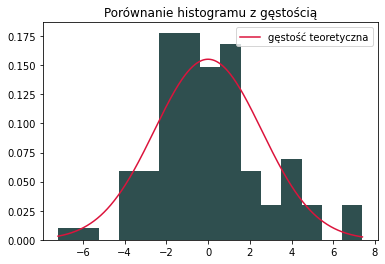

In [66]:
x_range = np.linspace(min(e_tab), max(e_tab), 1000)
ecdf = ECDF(e_tab)
plt.hist(e_tab, color="darkslategray", bins=15, density=True)
plt.plot(x_range, norm.pdf(x_range, loc=np.mean(e_tab), scale=np.std(e_tab)), color="crimson", label="gęstość teoretyczna")
plt.legend()
plt.title("Porównanie histogramu z gęstością")
plt.savefig("hist_residuals.png")
print(np.std(e_tab))

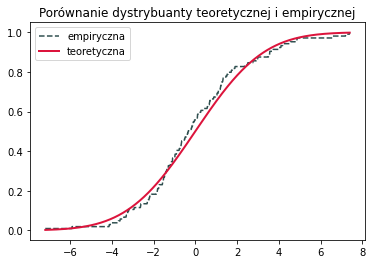

In [65]:
plt.plot(x_range, ecdf(x_range), label="empiryczna", linestyle="--", color="darkslategray")
plt.plot(x_range, norm.cdf(x_range, loc=np.mean(e_tab), scale=np.std(e_tab)), label="teoretyczna", color="crimson", linewidth=2)
plt.title("Porównanie dystrybuanty teoretycznej i empirycznej")
plt.legend()
plt.savefig("dystr_residuals.png")